In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
data_path = r"C:\Users\HP\OneDrive\Documents\Desktop\SeoulBikeData.csv"
df= pd.read_csv(data_path, encoding="unicode_escape")
df.shape


(8760, 14)

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


df.info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df["weekday"] = df["Date"].dt.day_name()
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df.drop("Date", axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23984\3291666186.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])


In [9]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017


In [10]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  weekday                    8760 non-null   objec

In [ ]:
sns.pairplot(df)

# Show the plot
plt.show()

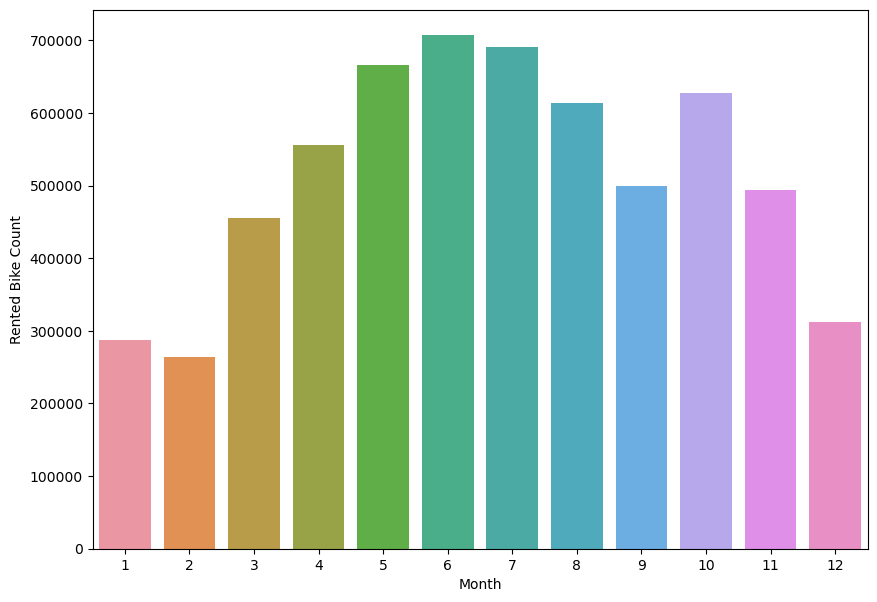

In [20]:
plt.figure(figsize=(10, 7))

# Group by 'Month' and sum the 'Rented Bike Count'
Month = df.groupby("Month")["Rented Bike Count"].sum().reset_index()

# Create a bar plot
sns.barplot(x="Month", y="Rented Bike Count", data=Month)

# Show the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23984\3088068599.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Day = df.groupby("Day").sum().reset_index()


<Axes: xlabel='Day', ylabel='Rented Bike Count'>

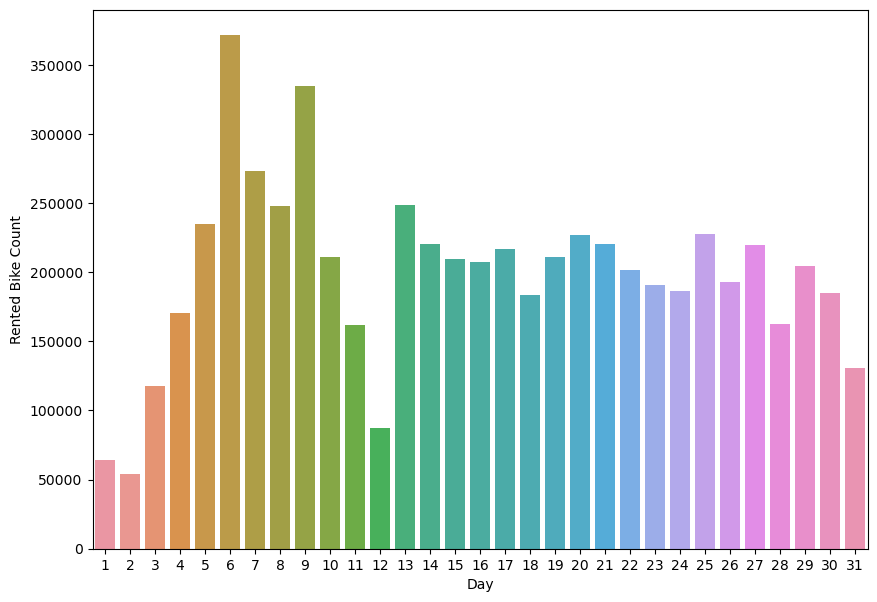

In [14]:
plt.figure(figsize=(10,7))
Day = df.groupby("Day").sum().reset_index()
sns.barplot(x="Day", y="Rented Bike Count", data=Day)

C:\Users\HP\AppData\Local\Temp\ipykernel_23984\32593426.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Hour = df.groupby("Hour").sum().reset_index()


<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

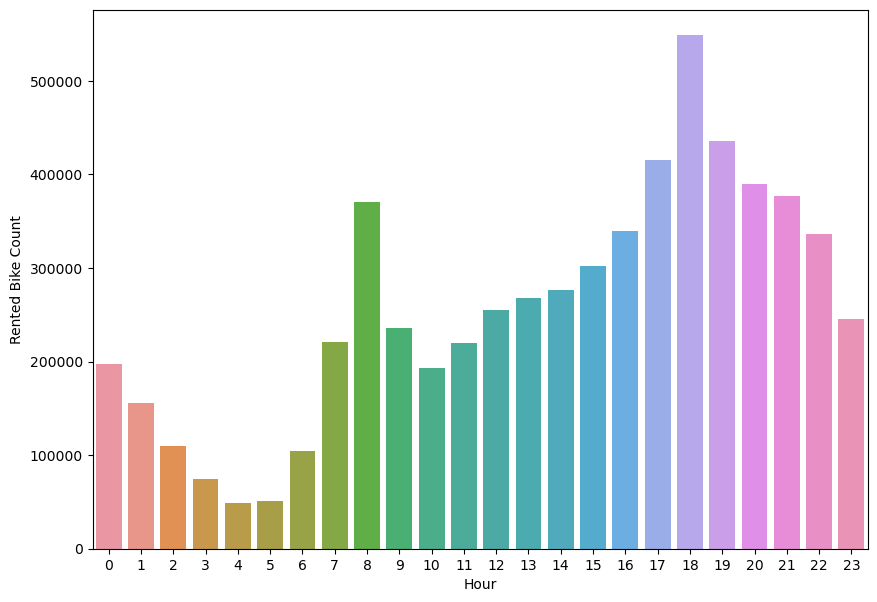

In [15]:
plt.figure(figsize=(10,7))
Hour = df.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour", y="Rented Bike Count", data=Hour)




<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

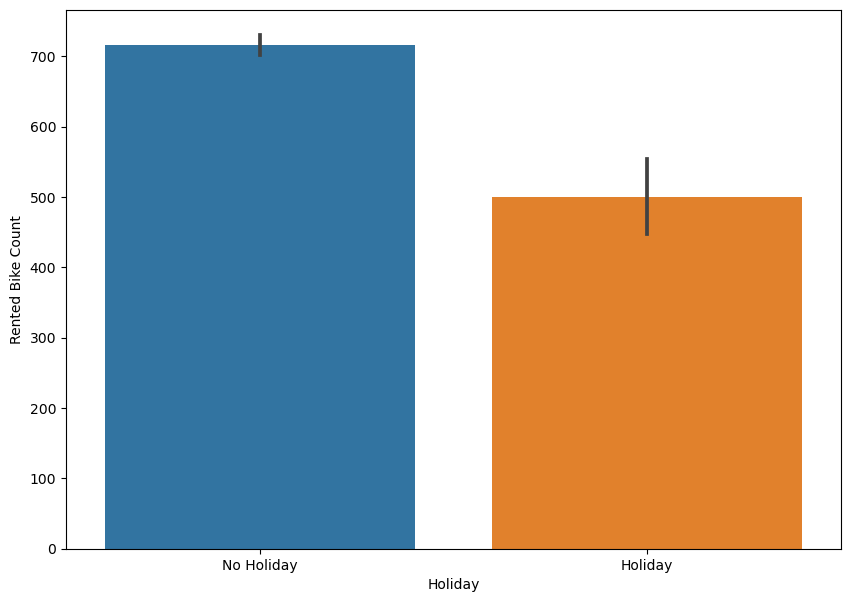

In [16]:
plt.figure(figsize=(10,7))
sns.barplot(x="Holiday", y="Rented Bike Count", data=df)

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

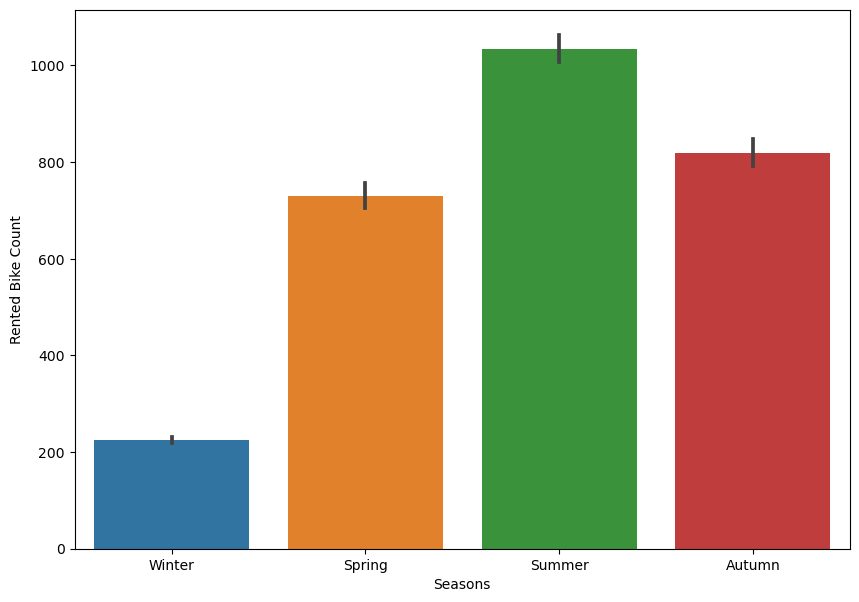

In [17]:
plt.figure(figsize=(10,7))
sns.barplot(x="Seasons", y="Rented Bike Count", data=df)

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

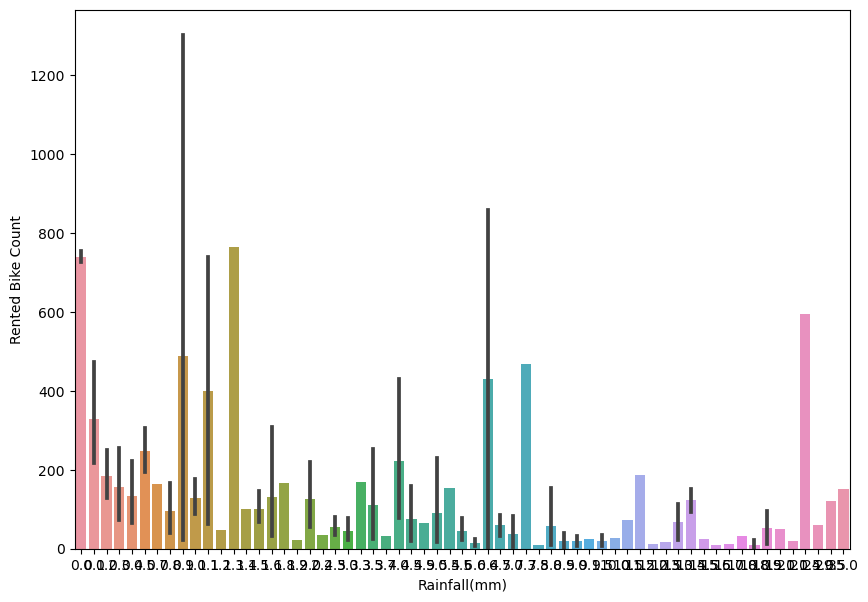

In [18]:
plt.figure(figsize=(10,7))
sns.barplot(x="Rainfall(mm)", y="Rented Bike Count", data=df)

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

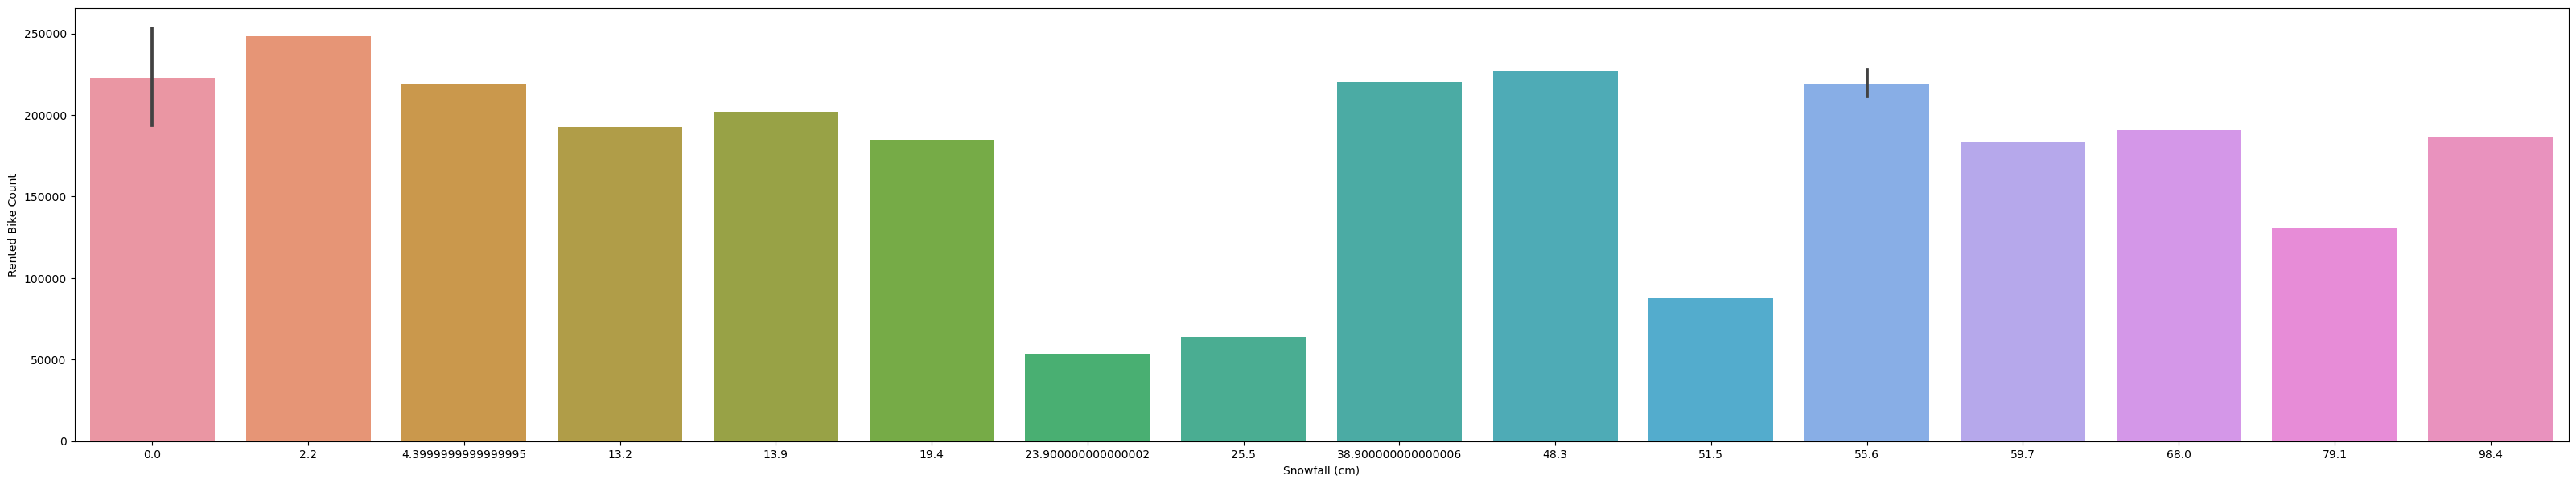

In [21]:
plt.figure(figsize=(40,7))
sns.barplot(x="Snowfall (cm)", y="Rented Bike Count", data=Day)

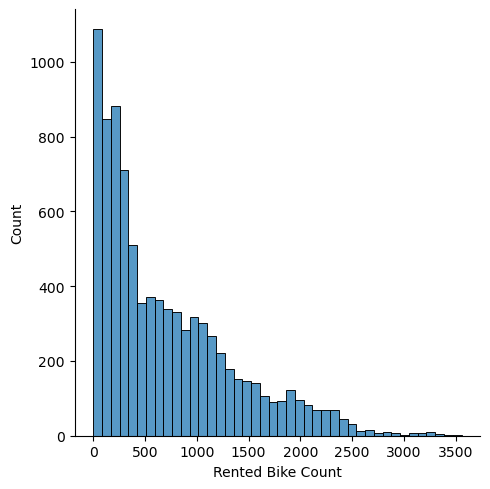

In [22]:
sns.displot(df["Rented Bike Count"])

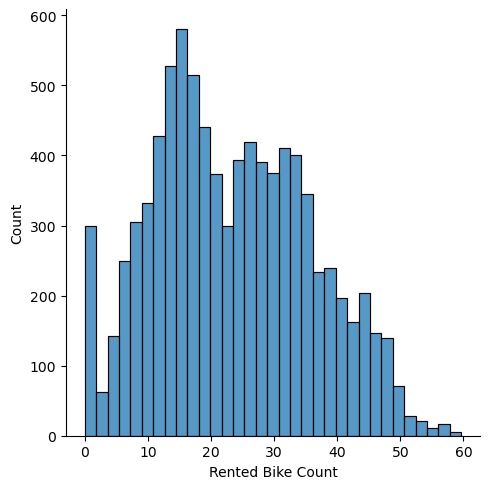

In [23]:
sns.displot(np.sqrt(df["Rented Bike Count"]))

In [24]:
df.skew(). sort_values(ascending=True)
# not running

C:\Users\HP\AppData\Local\Temp\ipykernel_23984\3668415382.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(). sort_values(ascending=True)


Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

In [25]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_23984\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,4.684885e-02,7.086107e-02,2.151618e-01
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,4.206322e-16,1.036729e-15,2.336763e-14
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,8.090791e-02,4.968327e-02,3.777958e-01
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,7.047359e-03,4.779778e-02,3.592468e-02
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-6.123440e-02,-8.206909e-02,-3.780878e-03
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-1.068595e-01,7.788783e-02,5.238110e-02
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,6.970777e-02,6.510073e-02,3.363497e-01
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.445555e-03,-3.041240e-02,1.280860e-01
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,1.199827e-02,-2.279368e-02,2.752192e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,1.014355e-01,5.475846e-02,-2.064178e-01


C:\Users\HP\AppData\Local\Temp\ipykernel_23984\2281117400.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


<Axes: >

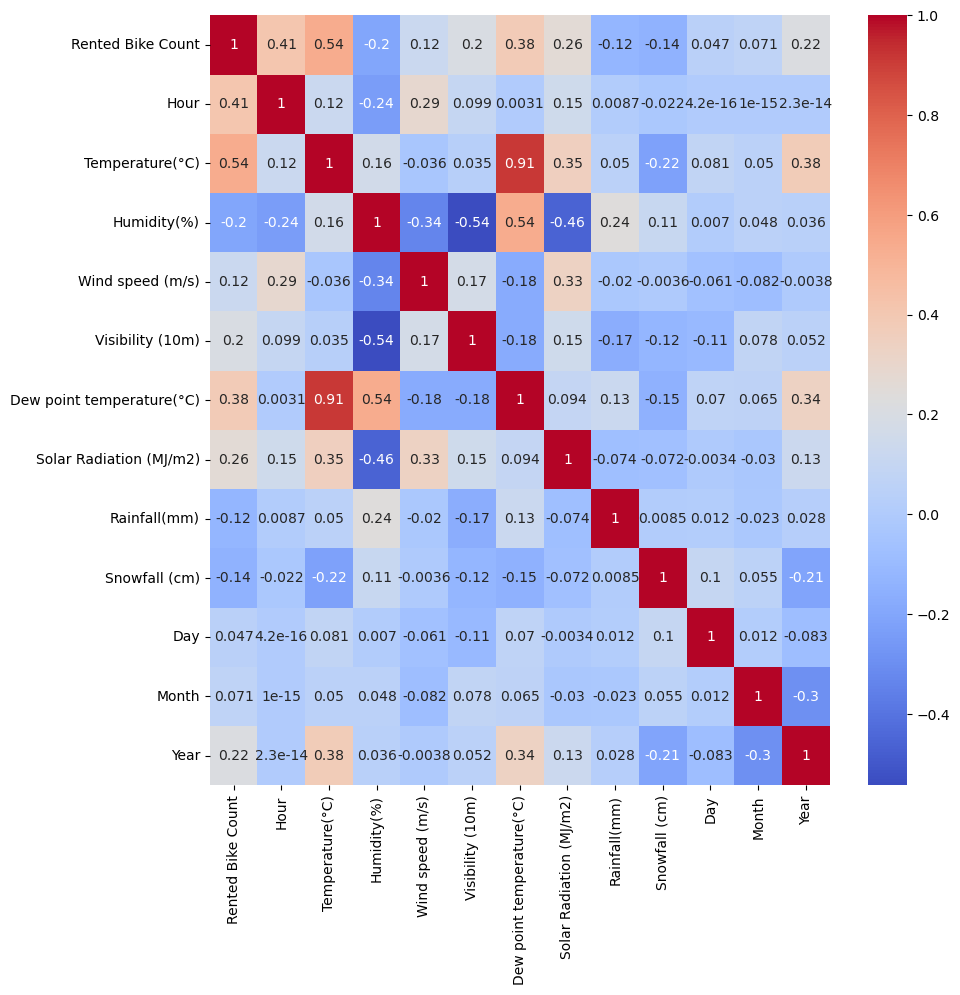

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [30]:
# Drop the 'Dew Point Temperature' column from the DataFrame
df = df.drop(columns=['Dew point temperature(°C)'])

In [31]:
def get_vif(df):
    vif = pd.DataFrame()
    vif["Variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

In [32]:
not_for_vif = ["Day", "Month", "Year", "Rented Bike Count"]
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])


,Variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


In [33]:
df[[i for i in df.describe().columns if i not in not_for_vif]]

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,0.0,0.0,0.0
8756,20,3.4,37,2.3,2000,0.0,0.0,0.0
8757,21,2.6,39,0.3,1968,0.0,0.0,0.0
8758,22,2.1,41,1.0,1859,0.0,0.0,0.0


In [34]:
not_for_vif = ["Day", "Month", "Year", "Rented Bike Count","Dew point temperature(°C"]
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,Variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


In [41]:
column_name = 'Dew point temperature(°C)'

if column_name in df.columns:
    df.drop([column_name], axis=1, inplace=True)
else:
    print(f"Column '{column_name}' does not exist in the DataFrame.")

Column 'Dew point temperature(°C)' does not exist in the DataFrame.


In [42]:
## Encoding Label

In [43]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int64  
 14  Month                   

In [45]:
cat_features = ["Seasons", "Holiday" , "weekday"]

In [46]:
df["Holiday"].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [53]:
df["Holiday"] = df["Holiday"].map({"No Holiday":0, "Holiday":1})
df["Functioning Day"] = df["Functioning Day"].map({"No":0,"Yes":1})


In [54]:
df["Functioning Day"].value_counts()

Series([], Name: Functioning Day, dtype: int64)

In [55]:
df["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [56]:
df_season= pd.get_dummies(df["Seasons"], drop_first = True)
df_season = pd.get_dummies(df["weekday"], drop_first = True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  0 non-null      float64
 11  Functioning Day          0 non-null      float64
 12  weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int64  
 14  Month                   

In [59]:
df= pd.concat([df, df_season, df_weekday], axis=1)

NameError: name 'df_weekday' is not defined

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  0 non-null      float64
 11  Functioning Day          0 non-null      float64
 12  weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int64  
 14  Month                   

In [61]:
df.drop(["Seasons", "weekday"], axis=1, inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  0 non-null      float64
 10  Functioning Day          0 non-null      float64
 11  Day                      8760 non-null   int64  
 12  Month                    8760 non-null   int64  
 13  Year                     8760 non-null   int64  
dtypes: float64(7), int64(7)


In [63]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,NaN,NaN,12,1,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,NaN,NaN,12,1,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,NaN,NaN,12,1,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,NaN,NaN,12,1,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,NaN,NaN,12,1,2017


In [64]:
df.shape

(8760, 14)